In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
import scipy.stats as sps

sns.set()

confirmed_min = 500
dead_min = 0

In [14]:
us_state_dict = pd.read_pickle('us_state_dict.pkl')
ny = us_state_dict['New York']
ny

confirmed  deceased  recovered      inc  dead_inc    factor  \
date                                                                      
2020-03-10      173.0       0.0        0.0      NaN       NaN       NaN   
2020-03-11      220.0       0.0        0.0     47.0       0.0  1.271676   
2020-03-12      328.0       0.0        0.0    108.0       0.0  1.490909   
2020-03-13      421.0       0.0        0.0     93.0       0.0  1.283537   
2020-03-14      525.0       2.0        0.0    104.0       2.0  1.247031   
2020-03-15      732.0       3.0        0.0    207.0       1.0  1.394286   
2020-03-16      967.0      10.0        0.0    235.0       7.0  1.321038   
2020-03-17     1706.0      13.0        0.0    739.0       3.0  1.764219   
2020-03-18     2495.0      16.0        0.0    789.0       3.0  1.462485   
2020-03-19     5365.0      34.0        0.0   2870.0      18.0  2.150301   
2020-03-20     8310.0      42.0        0.0   2945.0       8.0  1.548928   
2020-03-21    11710.0      60.0        0.0   3400.0      18.0  1.409146   
2020-03-22    15800.0     117.0        0.0   4090.0      57.0  1.349274   
2020-03-23    20884.0     158.0        0.0   5084.0      41.0  1.321772   
2020-03-24    25681.0     210.0        0.0   4797.0      52.0  1.229697   
2020-03-25    30841.0     285.0        0.0   5160.0      75.0  1.200927   
2020-03-26    37877.0     385.0        0.0   7036.0     100.0  1.228138   
2020-03-27    44876.0     527.0        0.0   6999.0     142.0  1.184782   
2020-03-28    52410.0     728.0        0.0   7534.0     201.0  1.167885   
2020-03-29    59648.0     965.0        0.0   7238.0     237.0  1.138103   
2020-03-30    66663.0    1218.0        0.0   7015.0     253.0  1.117607   
2020-03-31    75833.0    1550.0        0.0   9170.0     332.0  1.137558   
2020-04-01    83948.0    1941.0        0.0   8115.0     391.0  1.107011   
2020-04-02    92506.0    2373.0        0.0   8558.0     432.0  1.101944   
2020-04-03   102987.0    2935.0        0.0  10481.0     562.0  1.113301   

            dead_factor      density  population  growth    gdp   conf_per_M  \
date                                                                           
2020-03-10          NaN  1068.424744    19440469 -0.0052  89076     8.898962   
2020-03-11          NaN  1068.424744    19440469 -0.0052  89076    11.316599   
2020-03-12          NaN  1068.424744    19440469 -0.0052  89076    16.872021   
2020-03-13          NaN  1068.424744    19440469 -0.0052  89076    21.655856   
2020-03-14          NaN  1068.424744    19440469 -0.0052  89076    27.005521   
2020-03-15     1.500000  1068.424744    19440469 -0.0052  89076    37.653413   
2020-03-16     3.333333  1068.424744    19440469 -0.0052  89076    49.741598   
2020-03-17     1.300000  1068.424744    19440469 -0.0052  89076    87.755085   
2020-03-18     1.230769  1068.424744    19440469 -0.0052  89076   128.340525   
2020-03-19     2.125000  1068.424744    19440469 -0.0052  89076   275.970708   
2020-03-20     1.235294  1068.424744    19440469 -0.0052  89076   427.458823   
2020-03-21     1.428571  1068.424744    19440469 -0.0052  89076   602.351723   
2020-03-22     1.950000  1068.424744    19440469 -0.0052  89076   812.737594   
2020-03-23     1.350427  1068.424744    19440469 -0.0052  89076  1074.253918   
2020-03-24     1.329114  1068.424744    19440469 -0.0052  89076  1321.007225   
2020-03-25     1.357143  1068.424744    19440469 -0.0052  89076  1586.432920   
2020-03-26     1.350877  1068.424744    19440469 -0.0052  89076  1948.358345   
2020-03-27     1.368831  1068.424744    19440469 -0.0052  89076  2308.380523   
2020-03-28     1.381404  1068.424744    19440469 -0.0052  89076  2695.922614   
2020-03-29     1.325549  1068.424744    19440469 -0.0052  89076  3068.238734   
2020-03-30     1.262176  1068.424744    19440469 -0.0052  89076  3429.083938   
2020-03-31     1.272578  1068.424744    19440469 -0.0052  89076  3900.780377   
2020-04-01     1.252258  1068.424744    19440469 -0.0052  89076  4

In [15]:
dick = pd.read_pickle('country_data.pkl')

def strip(x):
    return x.replace('\t','')

country_populations = pd.read_csv('world_pop.csv',
                                  sep=';',header=None,index_col=0,names=['population'],
                                 thousands=',',converters={0 : strip})

dick['New York'] = ny

swe = dick['Sweden']
us = dick['US']
india = dick['India']

swe_population = country_populations.loc['Sweden','population']
swe['conf_per_M'] = swe['confirmed'] / (swe_population / 1e6)
swe['dead_per_M'] = swe['deceased'] / (swe_population / 1e6)
us['dead_per_M'] = us['deceased'] / (country_populations.loc['US','population'] / 1e6) 
india

confirmed    factor    inc  deceased  dead_factor  dead_inc  \
2020-01-24          0       NaN    NaN         0          NaN       NaN   
2020-01-25          0       NaN    0.0         0          NaN       0.0   
2020-01-26          0       NaN    0.0         0          NaN       0.0   
2020-01-27          0       NaN    0.0         0          NaN       0.0   
2020-01-28          0       NaN    0.0         0          NaN       0.0   
...               ...       ...    ...       ...          ...       ...   
2020-03-30       1251  1.221680  227.0        32     1.185185       5.0   
2020-03-31       1397  1.116707  146.0        35     1.093750       3.0   
2020-04-01       1998  1.430208  601.0        58     1.657143      23.0   
2020-04-02       2543  1.272773  545.0        72     1.241379      14.0   
2020-04-03       2567  1.009438   24.0        72     1.000000       0.0   

            pct_dead  conf_over_dead  dead_conf_ratio  
2020-01-24       NaN             NaN              NaN  
2020-01-25       NaN             NaN              NaN  
2020-01-26       NaN             NaN              NaN  
2020-01-27       NaN             NaN              NaN  
2020-01-28       NaN             NaN              NaN  
...              ...             ...              ...  
2020-03-30  2.557954       39.093750         0.970128  
2020-03-31  2.505369       39.914286         0.979443  
2020-04-01  2.902903       34.448276         1.158673  
2020-04-02  2.831302       35.319444         0.975335  
2020-04-03  2.804831       35.652778         0.990651  

[71 rows x 9 columns]

no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete
no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete
no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete
no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete


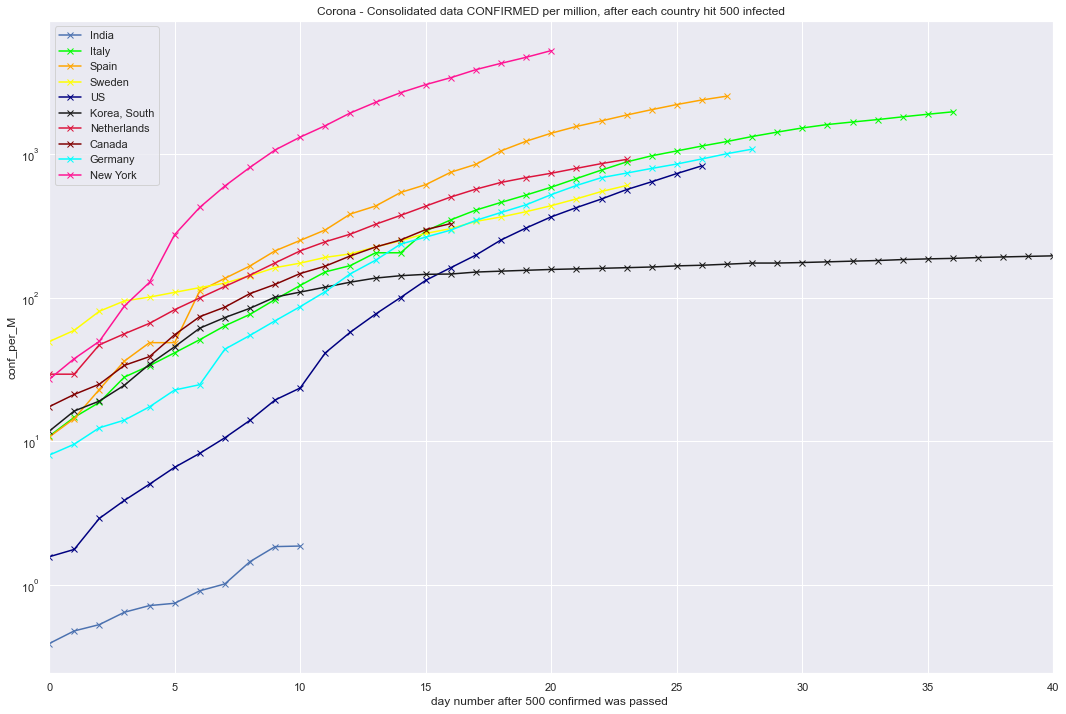

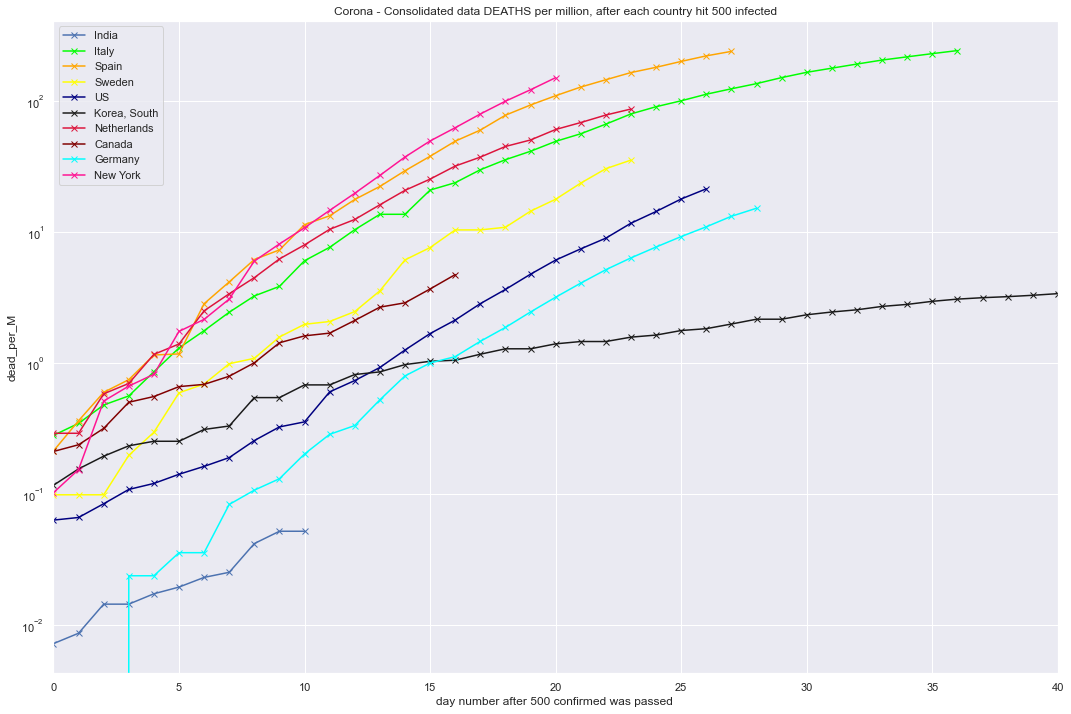

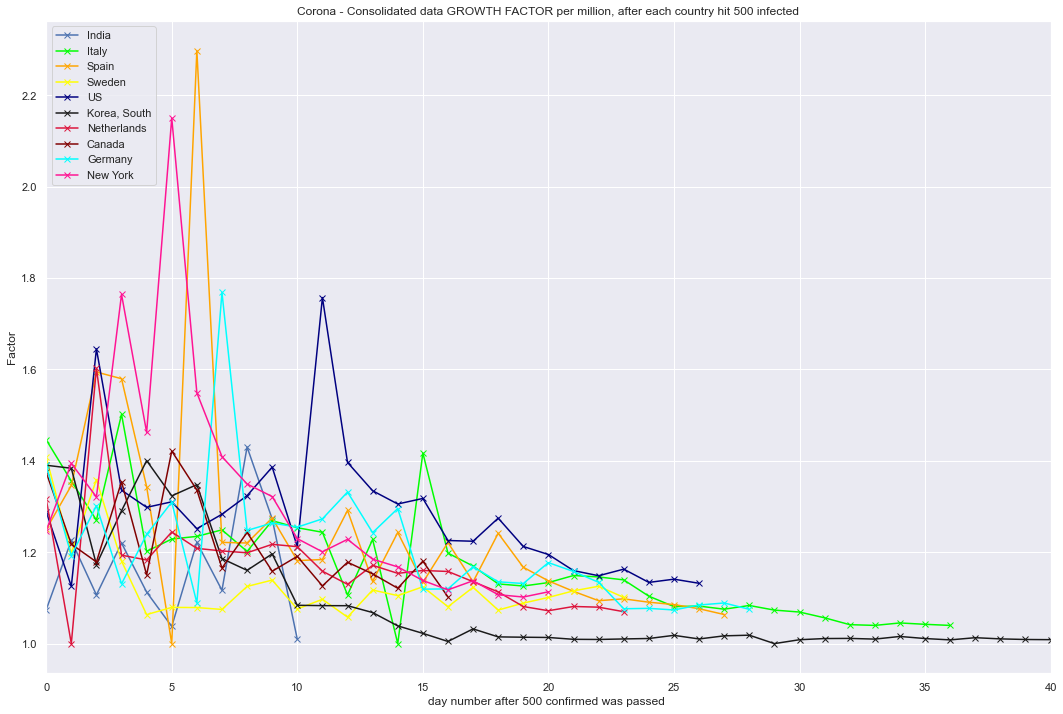

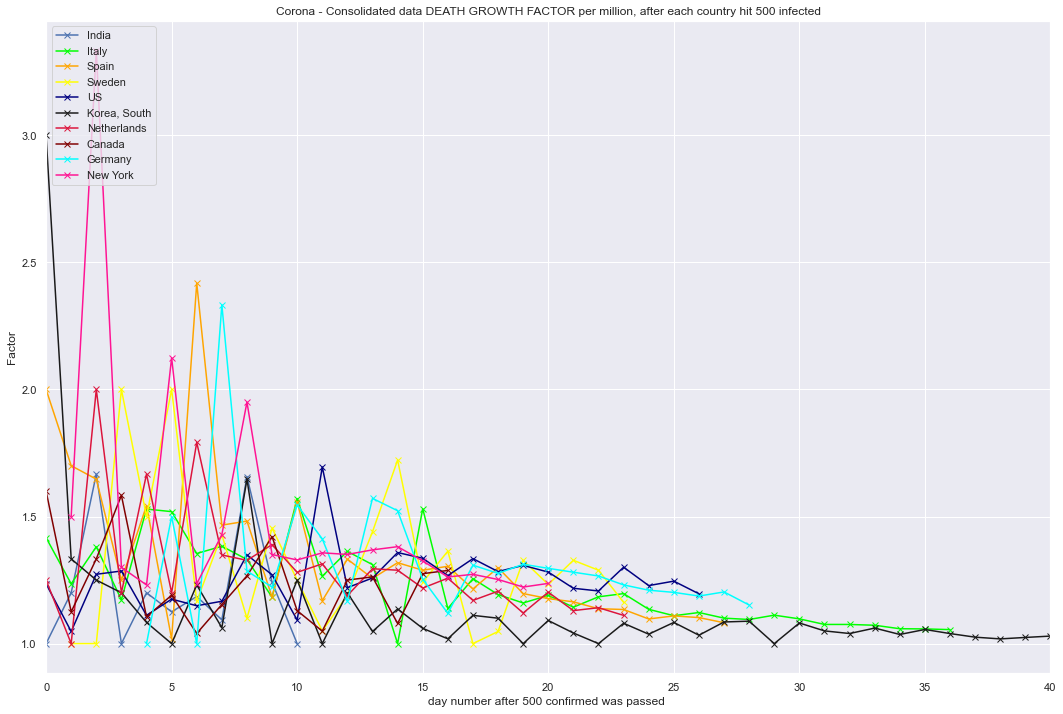

In [16]:

countries = ['India','Italy','Spain','Sweden','US',
             'Korea, South','Netherlands','Canada','Germany','New York']

#countries = ['Finland','Norway','Denmark','Sweden','Iceland']

colors = ['b','lime','orange','yellow','navy','k','crimson','maroon','cyan','deeppink']


plt.figure(figsize=(18,12))
plt.title('Corona - Consolidated data CONFIRMED per million, after each country hit {} infected'.format(confirmed_min))
plt.yscale('log')


def process_country(country,param,color_idx):
    df = dick[country]
    
    try:
        df = df.drop(['dead_conf_ratio','conf_over_dead'],axis=1)
    except:
        print ('no cols dead_conf_ratio,conf_over_dead  for {} - skipping delete'.format(country))
   
    population = country_populations.loc[country,'population']
    df['conf_per_M'] = df['confirmed'] / (population / 1e6)
    df['dead_per_M'] = df['deceased'] / (population / 1e6)
    df['factor_per_M'] = df['conf_per_M'] / df['conf_per_M'].shift()
    df['factor_dead_per_M'] = df['dead_per_M'] / df['dead_per_M'].shift()
    
    mask = ( ( df['confirmed'] >= confirmed_min ) & ( df['deceased'] >= dead_min))
    df = df[mask]
    df.reset_index(inplace=True)
    
    #slope,intercept,_,_,_ = sps.linregress(df.index,df[param])
    #slope = np.log10(slope)
    #intercept = np.log10(intercept)
    
    #X = np.linspace(min(df.index) ,max(df.index),40)
    
    #plt.plot([X[i] * slope + intercept for i in range(len(X))],'--',color=colors[color_idx],
             #label=country +'_regression, slope:{:.2f} intercept:{:.2f}'.format(slope,intercept))
    
    plt.plot(df[param],'x-',label=country,color=colors[color_idx])
    
    plt.legend(loc='upper left')  
    
    if 'factor' in param:
        plt.ylabel('Factor')
    else:
        plt.ylabel('{}'.format(param))
        
    plt.xlabel('day number after {} confirmed was passed '.format(confirmed_min))
    plt.yscale('log')
    
    ### CHANGE LIMIT WHEN NEEDED ###
    plt.xlim([0,40])
    
param = 'conf_per_M'

for i,c in enumerate(countries):
    process_country(c,param,i)

plt.savefig('Corona_consolidated_min_confirmed.jpg',format='jpg')

plt.figure(figsize=(18,12))
plt.title('Corona - Consolidated data DEATHS per million, after each country hit {} infected'.format(confirmed_min))

param = 'dead_per_M'

for i,c in enumerate(countries):
    process_country(c,param,i)
  
plt.savefig('Corona_consolidated_min_dead.jpg',format='jpg')

plt.figure(figsize=(18,12))
plt.title('Corona - Consolidated data GROWTH FACTOR per million, after each country hit {} infected'.format(confirmed_min))

param = 'factor_per_M'

for i,c in enumerate(countries):
    process_country(c,param,i)
    plt.yscale('linear')
    
plt.savefig('Corona_consolidated_min_factor.jpg',format='jpg')

plt.figure(figsize=(18,12))
plt.title('Corona - Consolidated data DEATH GROWTH FACTOR per million, after each country hit {} infected'.format(confirmed_min))

param = 'factor_dead_per_M'

for i,c in enumerate(countries):
    process_country(c,param,i)
    plt.yscale('linear')
    
    
plt.savefig('Corona_consolidated_dead_min_factor.jpg',format='jpg')


no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete
no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete


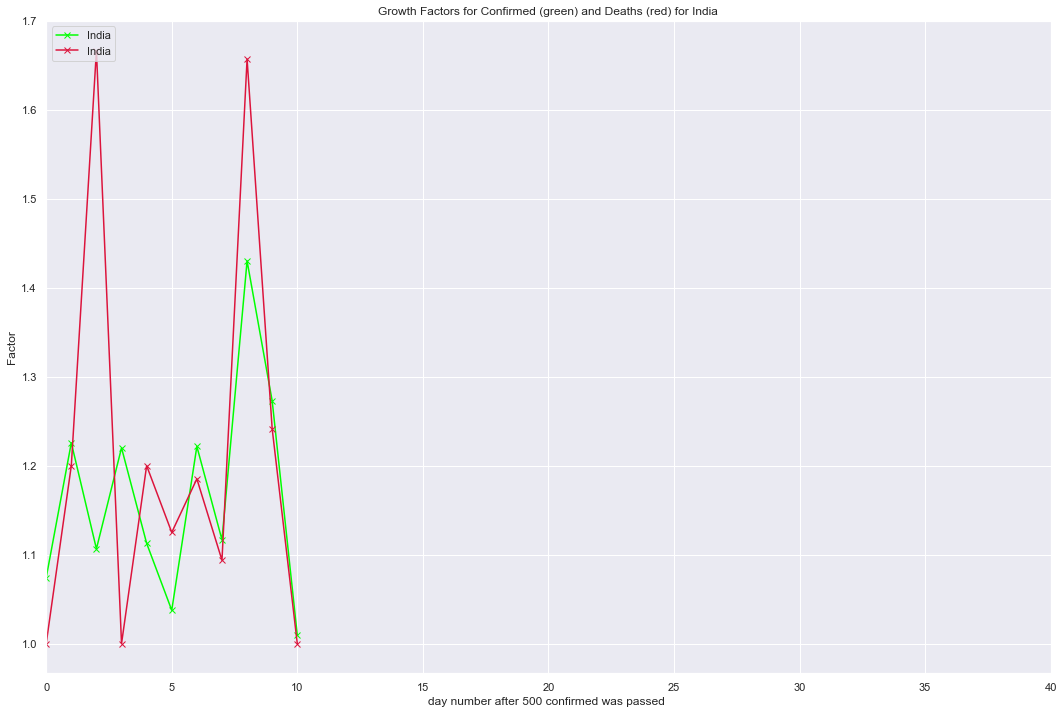

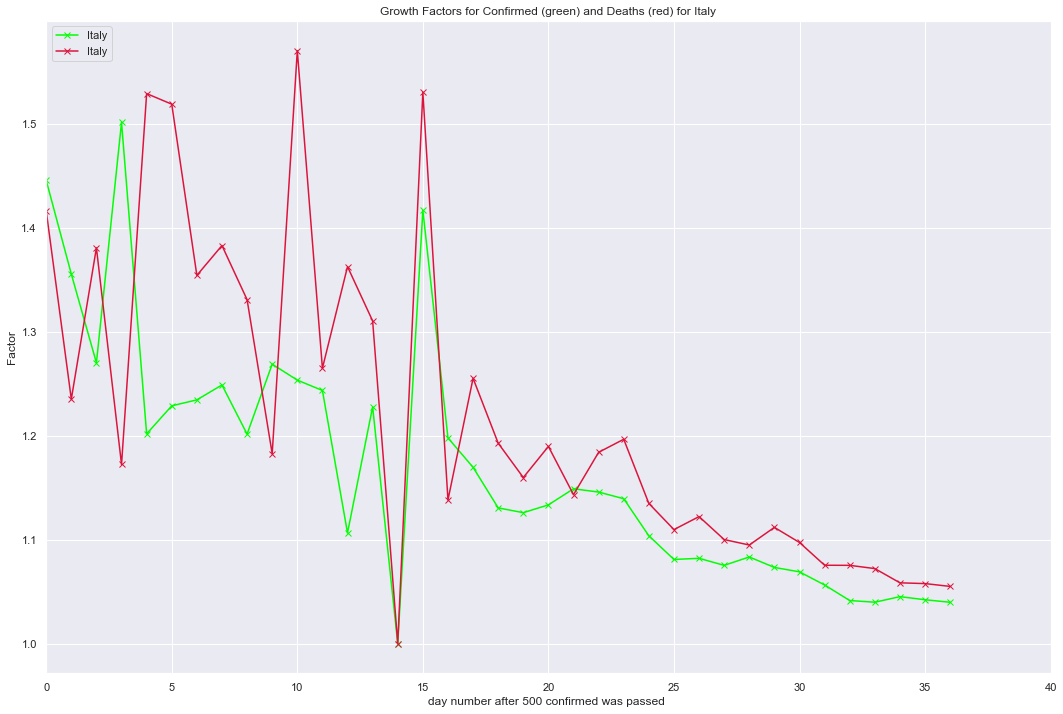

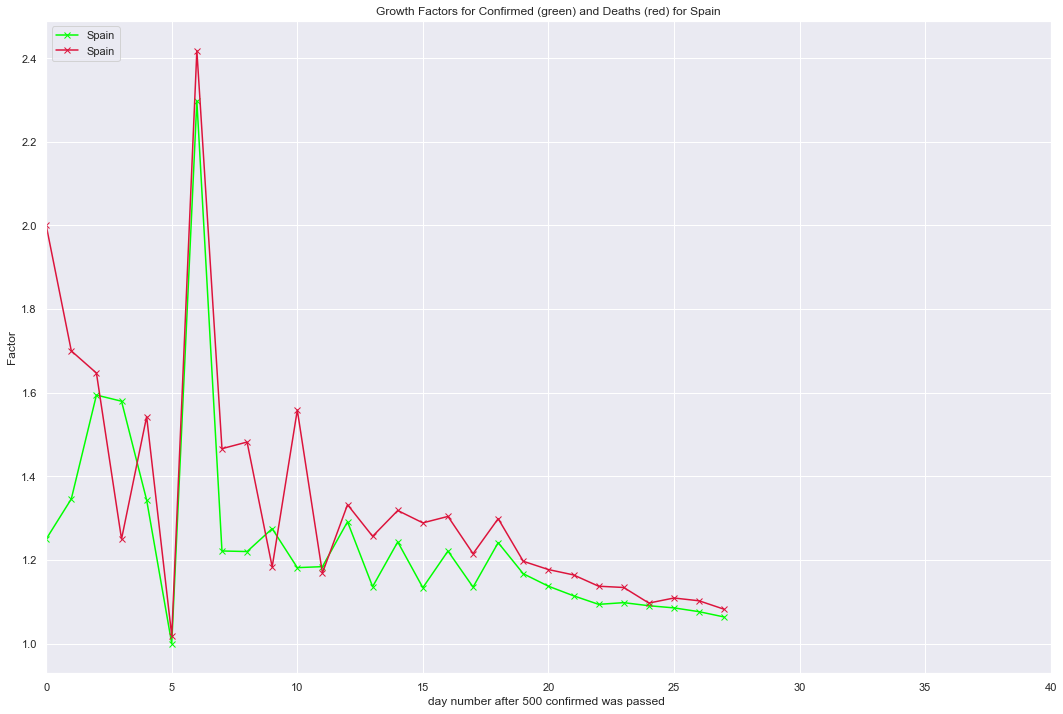

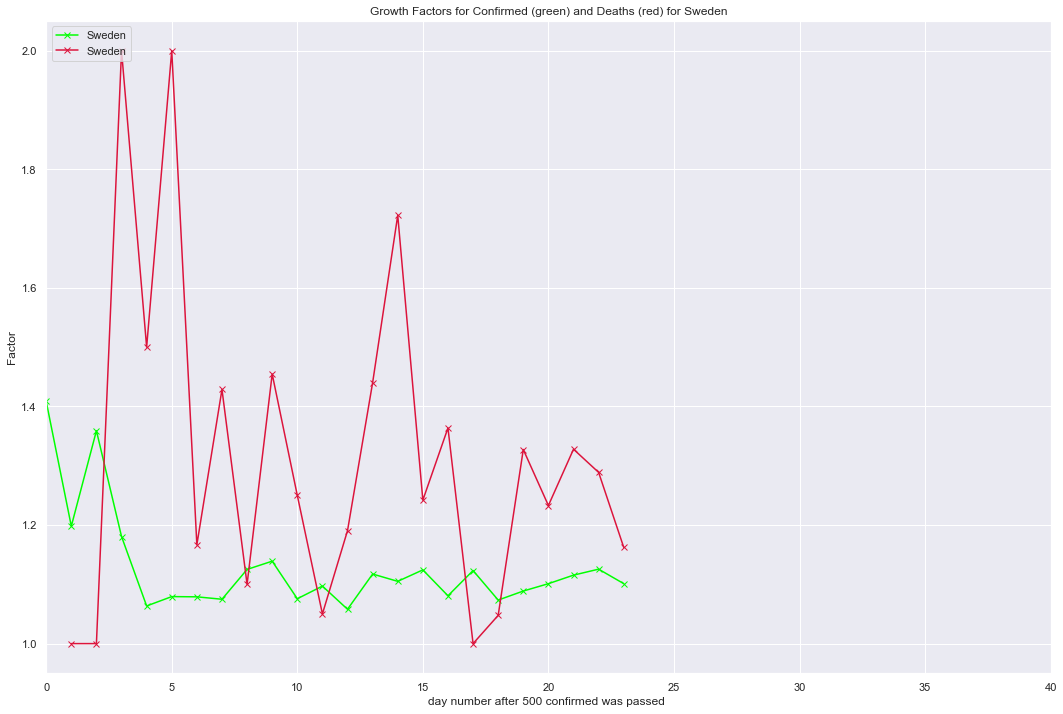

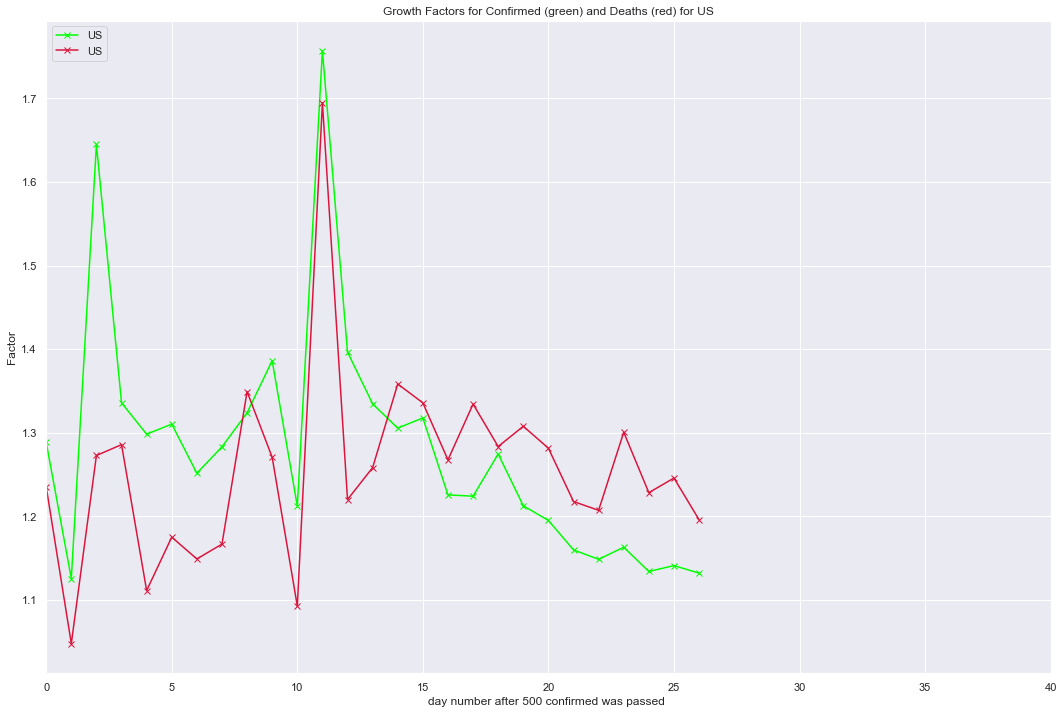

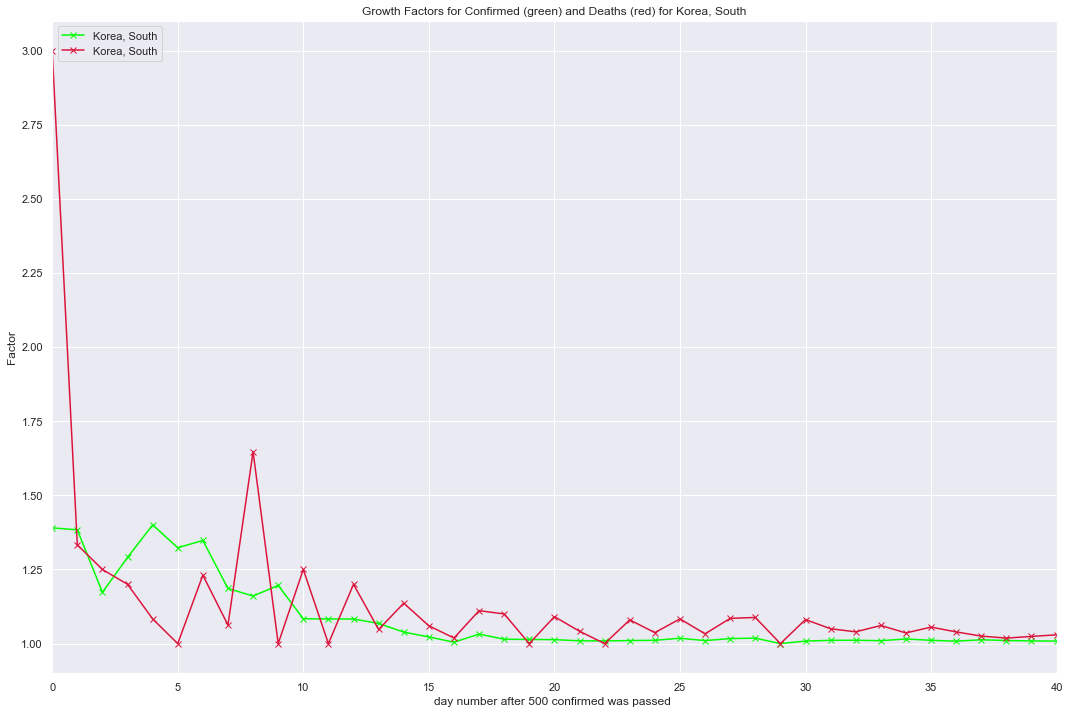

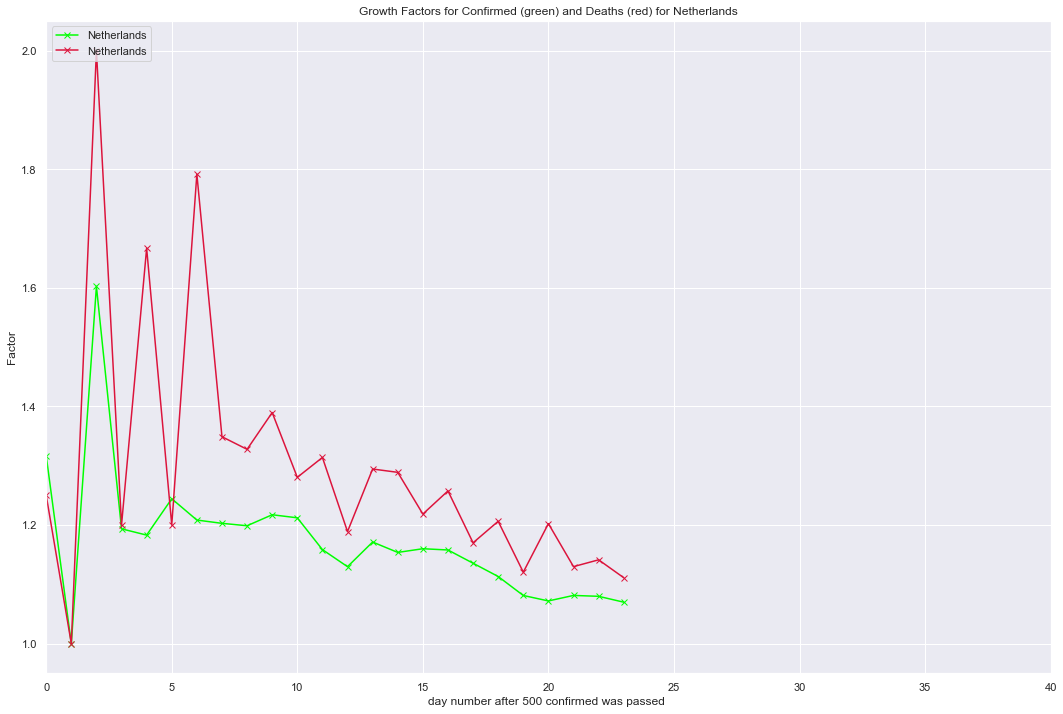

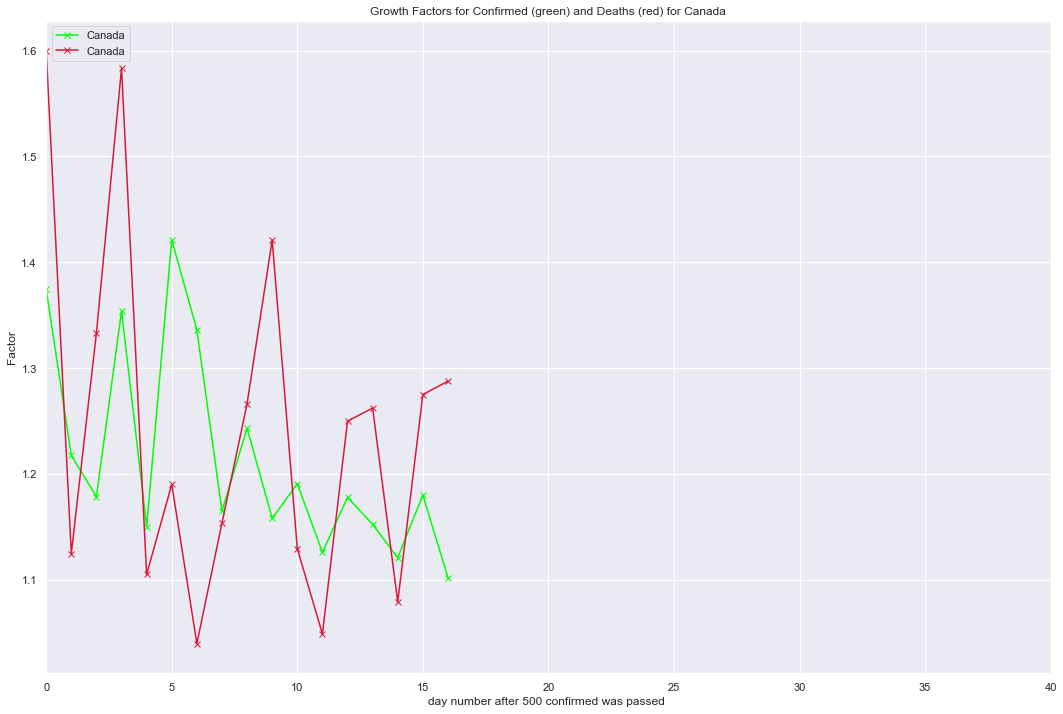

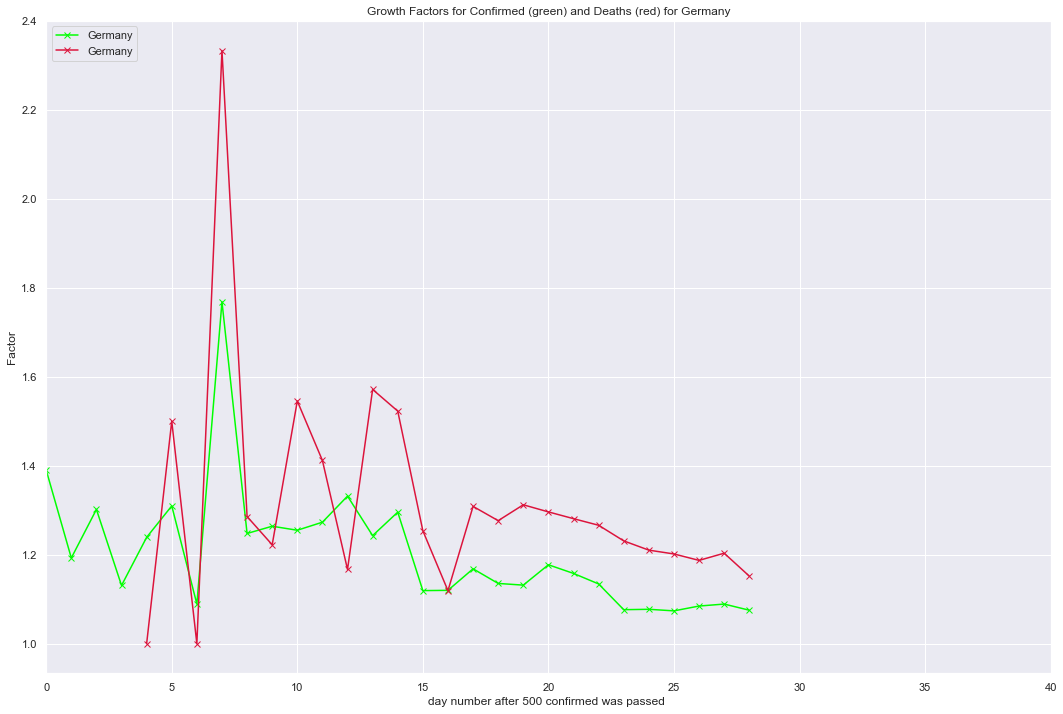

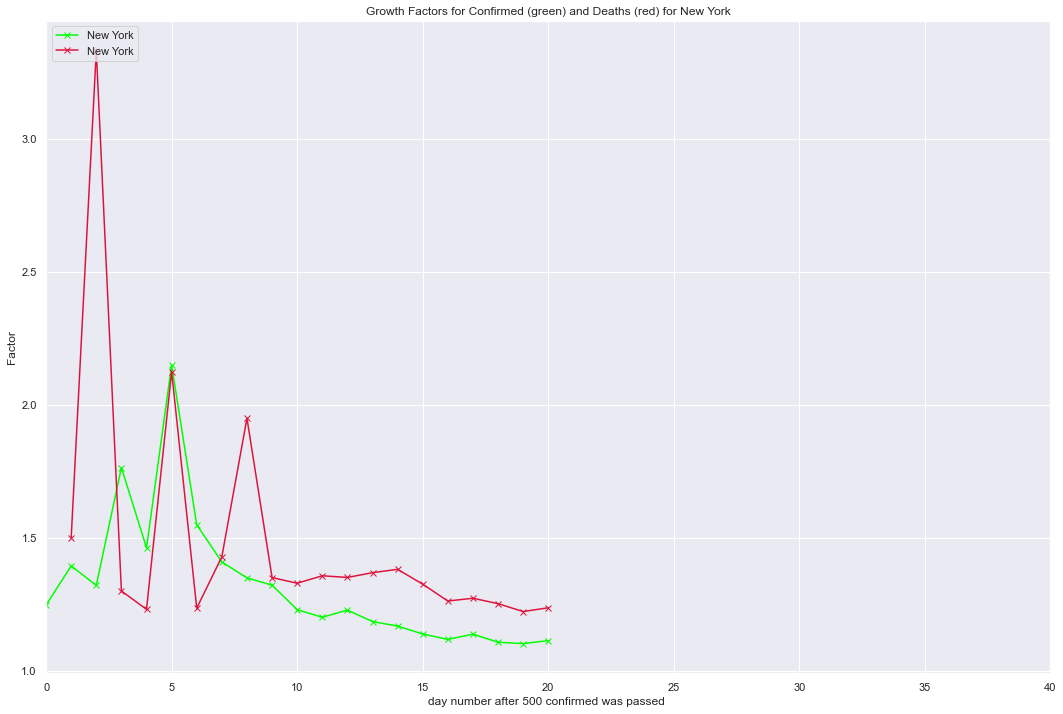

In [17]:
for i,c in enumerate(countries):
    plt.figure(figsize=(18,12))
    plt.title('Growth Factors for Confirmed (green) and Deaths (red) for {}'.format(c))
    
    process_country(c,'factor_per_M',1)
    process_country(c,'factor_dead_per_M',6)
    plt.yscale('linear')
    plt.savefig('Growth_factors_for_{}.jpg'.format(c),format='jpg')

 [-----------------100%-----------------] 100001 of 100000 complete in 138.7 sec
          beta_post    alpha_post
count  25000.000000  25000.000000
mean       0.514862      0.005509
std        0.263272      0.250481
min       -0.645881     -0.969144
25%        0.341603     -0.159576
50%        0.514432      0.004917
75%        0.690962      0.172352
max        1.520211      0.984690
 [-----------------100%-----------------] 100000 of 100000 complete in 138.5 sec
          beta_post    alpha_post
count  25000.000000  25000.000000
mean       0.655583      0.001391
std        0.133504      0.131282
min        0.103258     -0.542120
25%        0.568012     -0.085705
50%        0.656404      0.000829
75%        0.743504      0.089606
max        1.187892      0.615612
 [-----------------100%-----------------] 100000 of 100000 complete in 148.4 sec
          beta_post    alpha_post
count  25000.000000  25000.000000
mean       0.798189      0.000313
std        0.123809      0.123218
min      

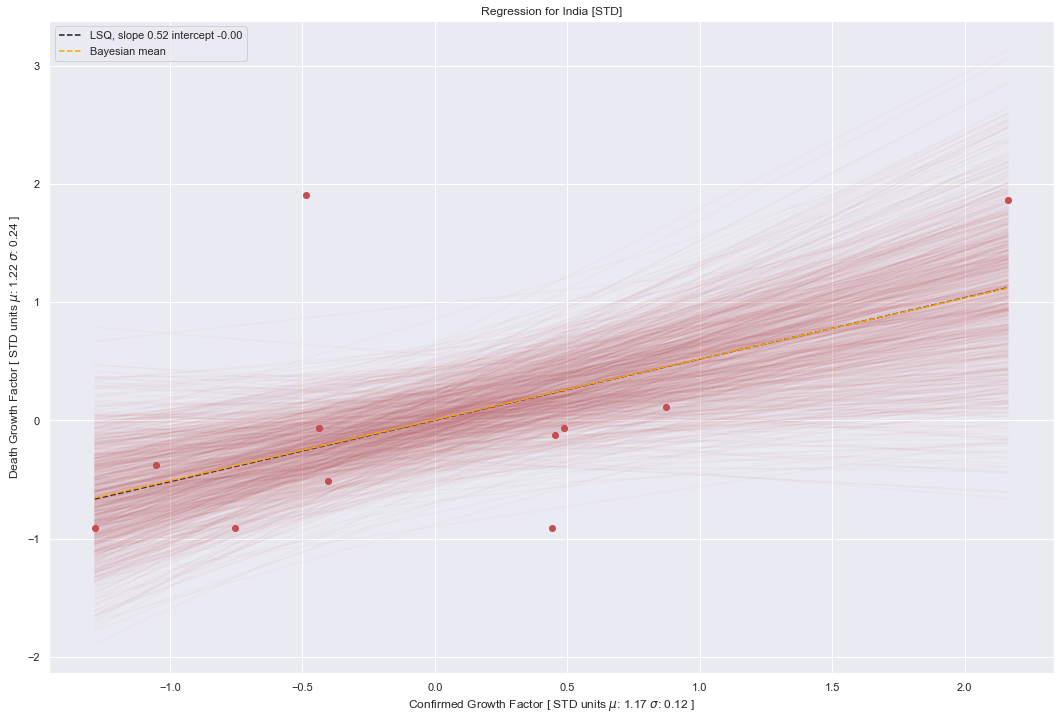

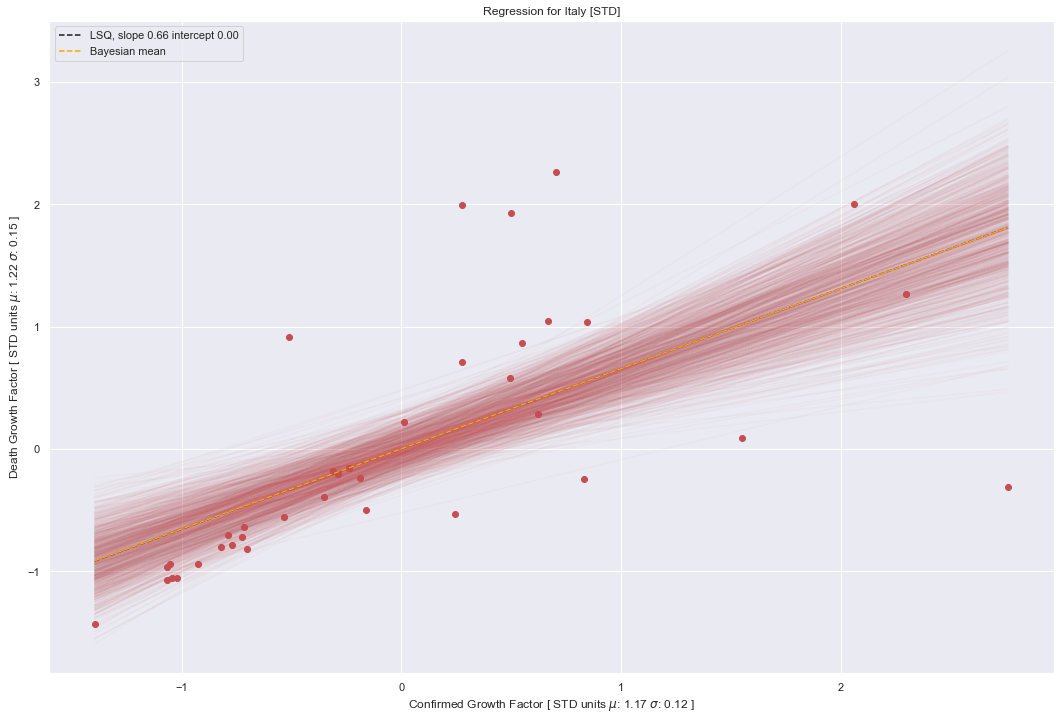

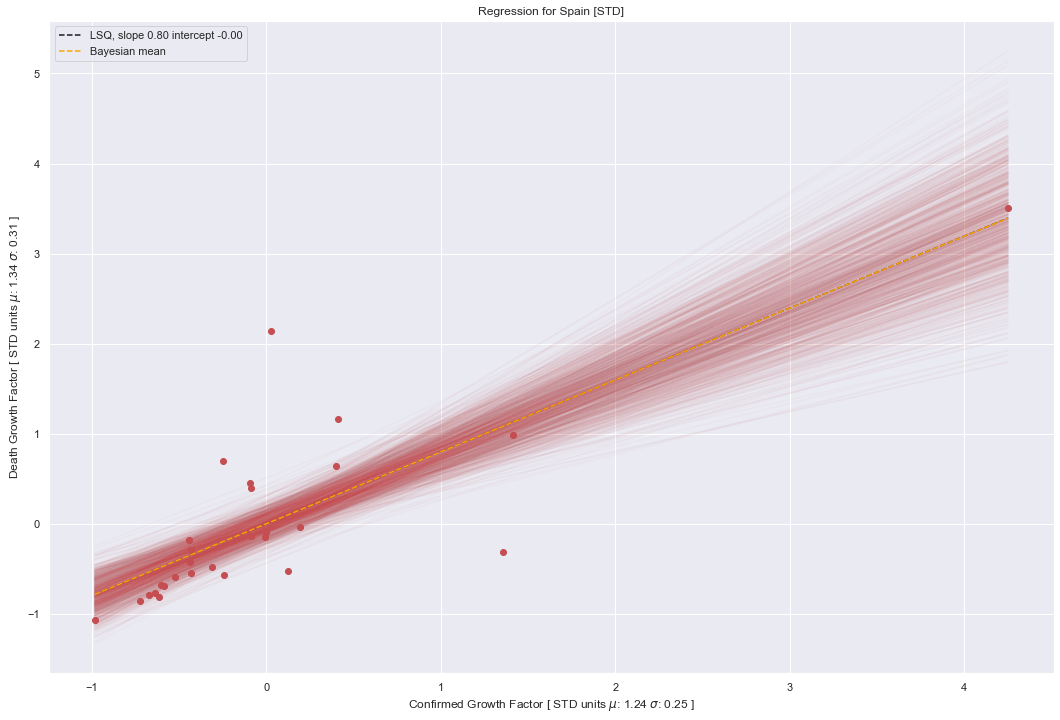

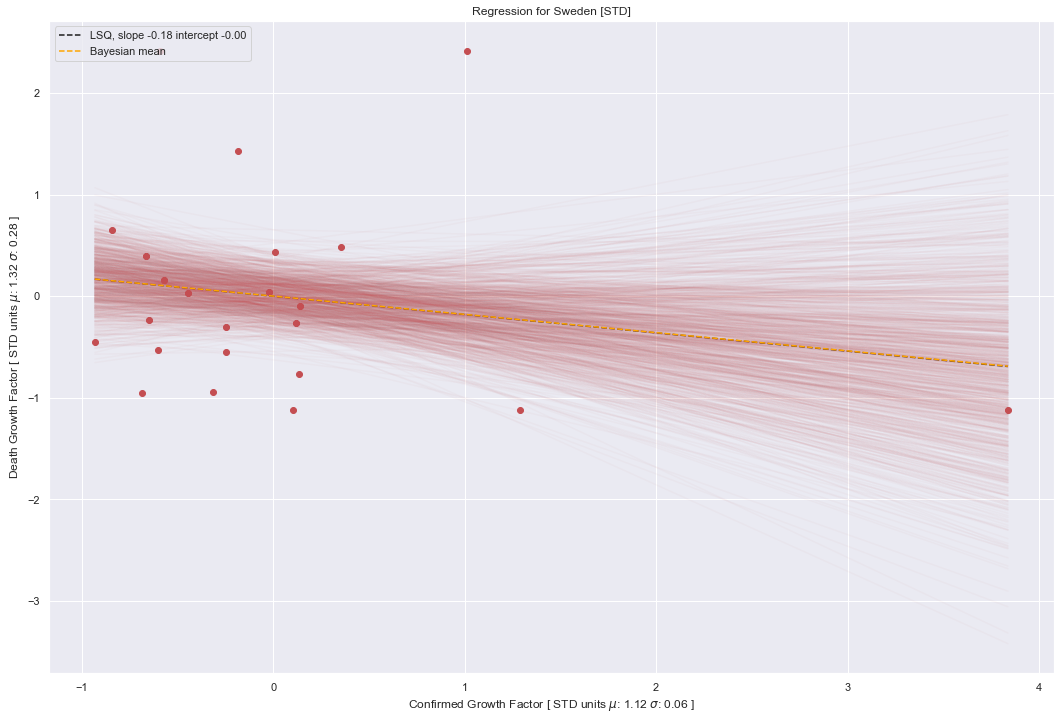

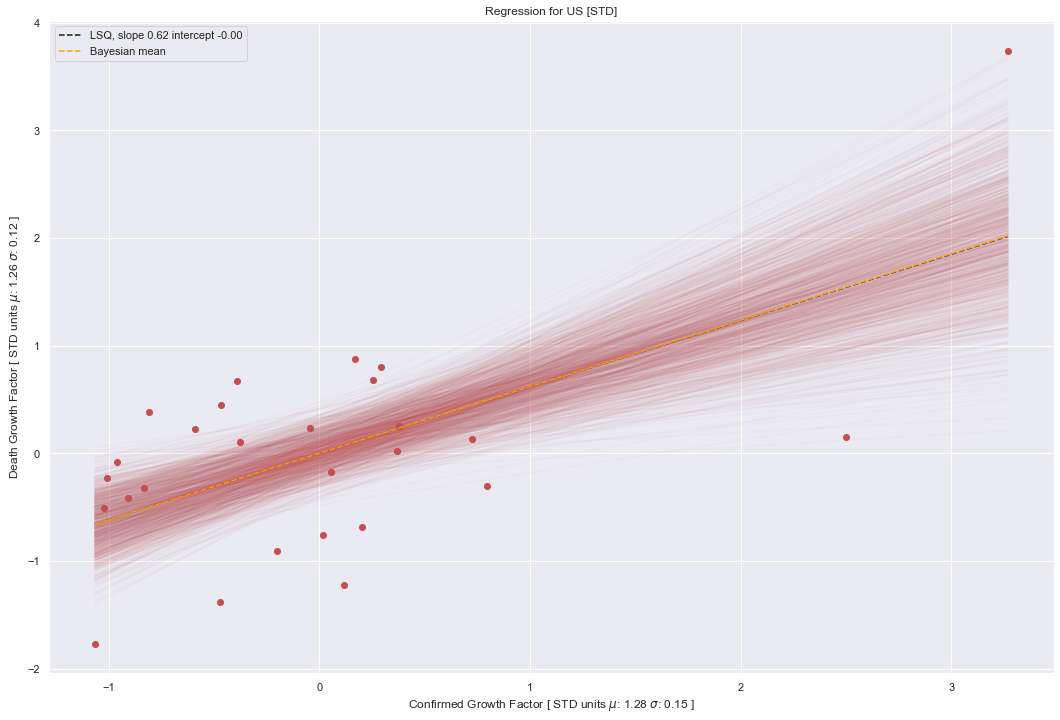

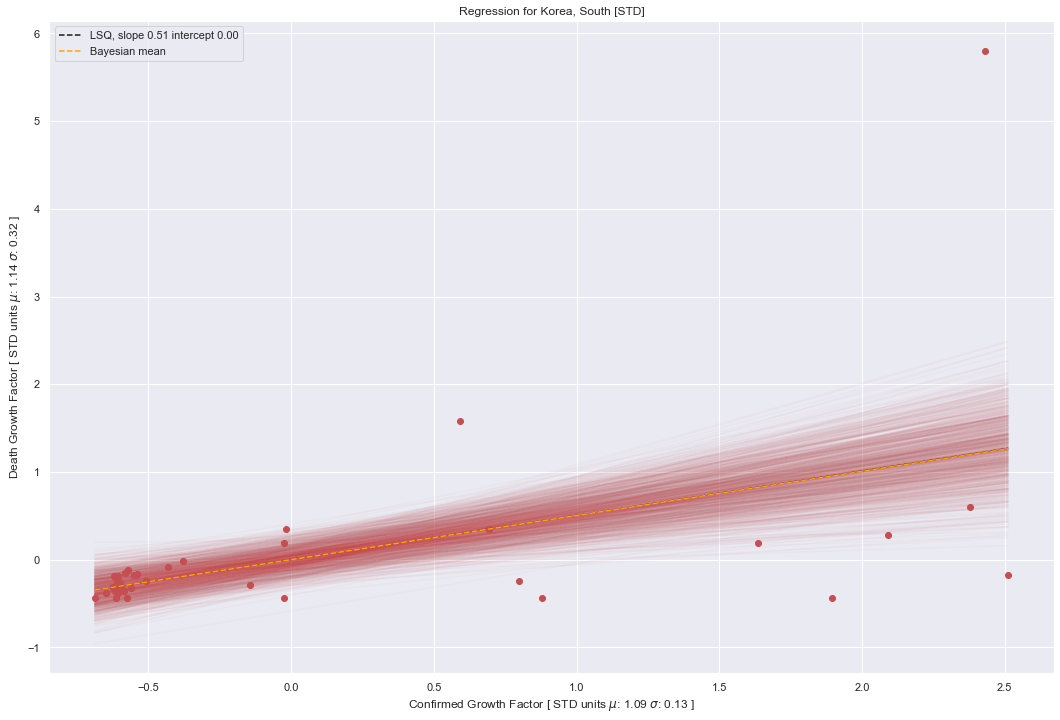

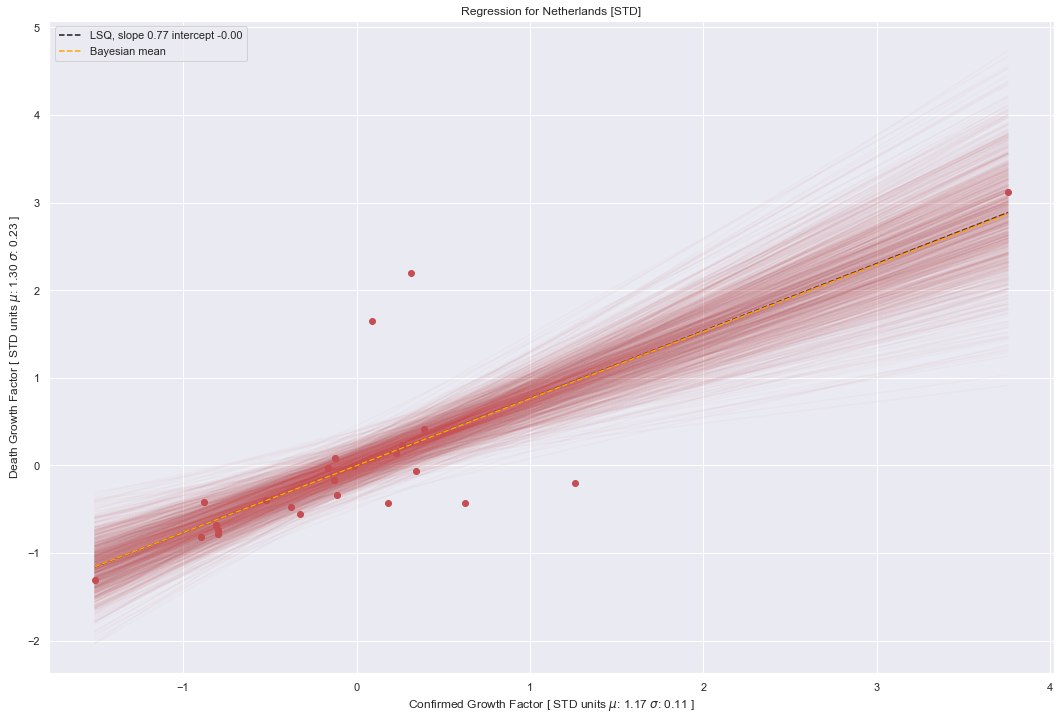

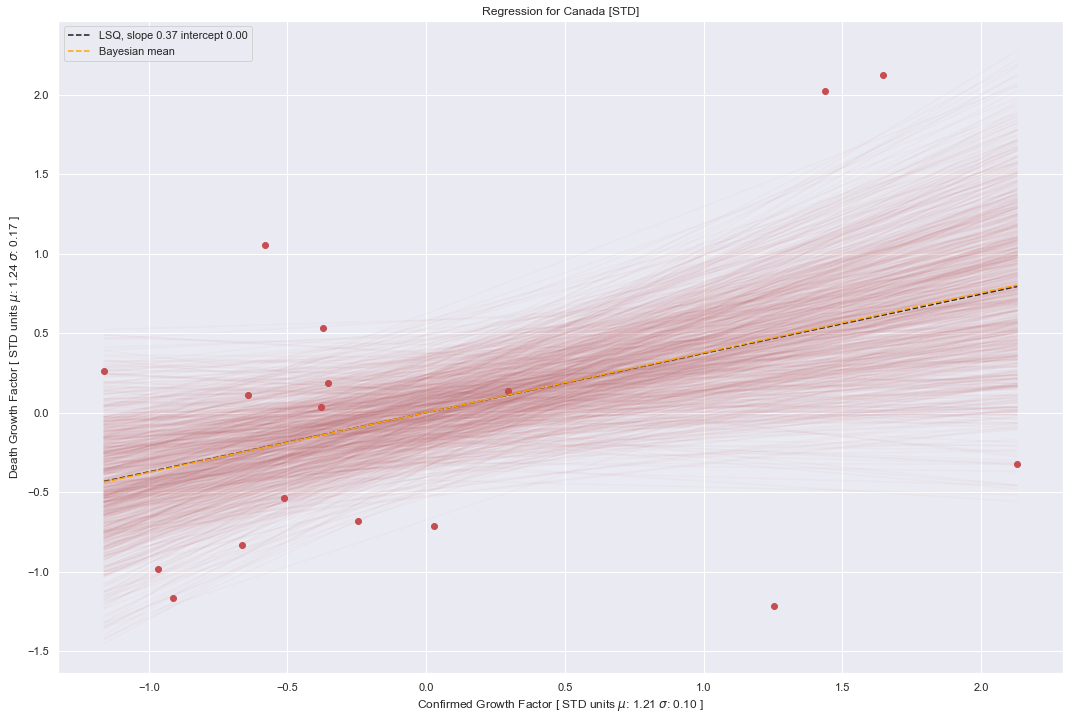

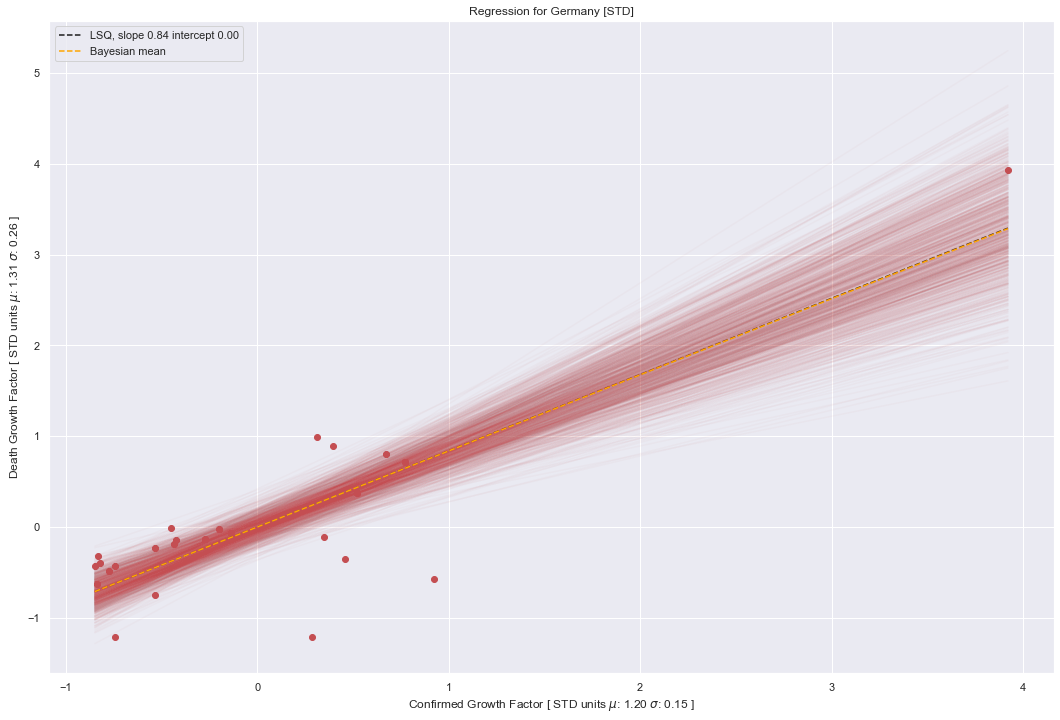

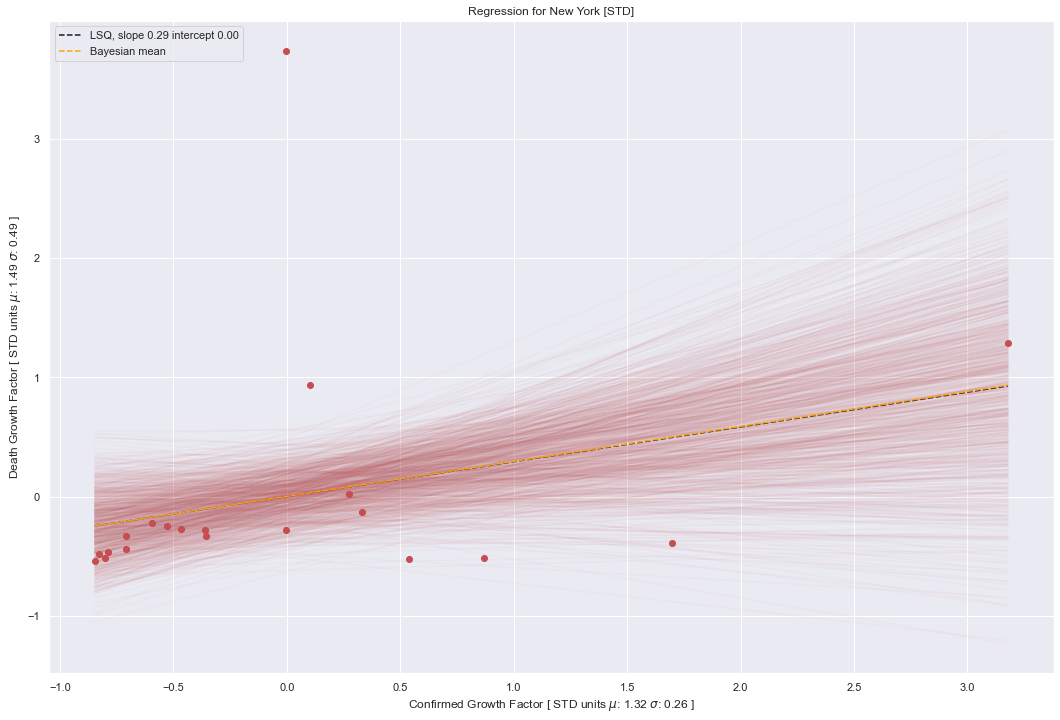

In [18]:
def regression(x,y,country):
    
    def standardize(x):
        return (x - x.mean()) / x.std()
    
    x_org = x
    y_org = y
    
    x = standardize(x)
    y = standardize(y)
    
    plt.figure(figsize=(18,12))
    plt.title('Regression for {} [STD]'.format(country))
    plt.ylabel(r'Death Growth Factor [ STD units $\mu$: {:.2f} $\sigma$: {:.2f} ]'.format(y_org.mean(),y_org.std()))
    plt.xlabel(r'Confirmed Growth Factor [ STD units $\mu$: {:.2f} $\sigma$: {:.2f} ]'.format(x_org.mean(),x_org.std()))
    plt.scatter(x,y,color='r')
    
    slope,intercept,_,_,_ = sps.linregress(x,y)
    
    X = np.linspace(min(x),max(x),1000)
    
    plt.plot(X,[X[i] * slope + intercept for i in range(len(X))], color='k',ls='dashed',
            label='LSQ, slope {:.2f} intercept {:.2f}'.format(slope,intercept))
    
    
    beta_mu = pm.Uniform('beta_mu',0,0.5)
    beta_sigma = pm.Uniform('beta_sigma',0,0.1)
    alpha_mu = pm.Uniform('alpha_mu', 0, 0.5)
    alpha_sigma = pm.Uniform('alpha_sigma',0,0.1)
    
    beta = pm.Normal('beta',beta_mu,beta_sigma / 1 ** 2)
    alpha = pm.Normal('alpha',alpha_mu,alpha_sigma / 1 ** 2)
    
    obs_sigma = pm.Uniform('obs_sigma',0,1)
    
    @pm.deterministic()
    def linreq(alpha=alpha,beta=beta,x=x):
        return x * beta + alpha
    
    obs = pm.Normal('linreq',linreq,1 / obs_sigma ** 2,observed=True,value=y)
    
    model = pm.Model([beta_mu,beta_sigma,alpha_mu,alpha_sigma,beta,alpha,linreq,obs,obs_sigma])
    
    try:
        map_ = pm.MAP(model)
        map_.fit()
    except:
        print ('cant fit {}'.format(country))
    
    mcmc = pm.MCMC(model)
    mcmc.sample(100000,50000,2)
    
    beta_post = mcmc.trace('beta')[:]
    alpha_post = mcmc.trace('alpha')[:]
    
    result = pd.DataFrame({'beta_post': beta_post,
                          'alpha_post' : alpha_post})
    
    print()
    print (result.describe())
    
    beta_samples = np.random.choice(result.beta_post,replace=True,size=len(X))
    alpha_samples = np.random.choice(result.alpha_post,replace=True,size=len(X))
    
    lines = np.array([X[i] * beta_samples + alpha_samples for i in range(len(X))])
    plt.plot(X,lines,alpha=0.03,color='r')
    
    plt.plot(X,[X[i] * result.beta_post.mean() + result.alpha_post.mean() for i in range(len(X))],
             color='orange',ls='dashed',label='Bayesian mean')
 
    plt.legend(loc='upper left')
    
    plt.savefig('growth_factor_regression_{}.jpg'.format(country),format='jpg')
    
for country in countries:

    df = dick[country]
    try:
        df = df.drop(['dead_conf_ratio','conf_over_dead'],axis=1)
    except:
        print ('Skipping delete col for {}'.format(country))
        
    population = country_populations.loc[country,'population']
    df['conf_per_M'] = df['confirmed'] / (population / 1e6)
    df['dead_per_M'] = df['deceased'] / (population / 1e6)
    df['factor_per_M'] = df['conf_per_M'] / df['conf_per_M'].shift()
    df['factor_dead_per_M'] = df['dead_per_M'] / df['dead_per_M'].shift()
    
    mask = ( ( df['confirmed'] >= confirmed_min ) & ( df['deceased'] >= dead_min))
    df = df[mask]
    df = df.replace(np.inf,np.nan)
    df.dropna(inplace=True)
    df.reset_index(inplace=True)

    regression(df['factor_per_M'],df['factor_dead_per_M'],country)
